In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score
from scipy.optimize import curve_fit

In [ ]:

df = pd.read_csv('realistic_ocean_climate_dataset.csv')


df.rename(columns={
    'SST (°C)': 'sst',
    'pH Level': 'pH',
    'Latitude': 'lat',
    'Longitude': 'lon',
    'Bleaching Severity': 'bleaching',
    'Species Observed': 'species',
    'Marine Heatwave': 'heatwave'
}, inplace=True)


df = df.dropna(subset=['sst', 'pH', 'lat', 'lon', 'species'])


features = ['sst', 'pH', 'species', 'lat', 'lon']
X = df[features]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
#I did this so I can mess and visualize the data for myself with the data. I ended up deleted most of what this was used for. 
# Exploratory: Unique Locations
'''    locations = df['Location'].unique()
    print("Unique Locations:", locations)

    #Group by Location (Optional)
    location_dict = {loc: [] for loc in locations}
    for index, row in df.iterrows():
        location_dict[row['Location']].append(index)

    print('red sea data \n', location_dict['Red Sea'])

    print('great barrier reef \n', location_dict['Great Barrier Reef'])
'''

'    locations = df[\'Location\'].unique()\n    print("Unique Locations:", locations)\n\n    #Group by Location (Optional)\n    location_dict = {loc: [] for loc in locations}\n    for index, row in df.iterrows():\n        location_dict[row[\'Location\']].append(index)\n\n    print(\'red sea data \n\', location_dict[\'Red Sea\'])\n\n    print(\'great barrier reef \n\', location_dict[\'Great Barrier Reef\'])\n'

Text(0, 0.5, 'Lat')

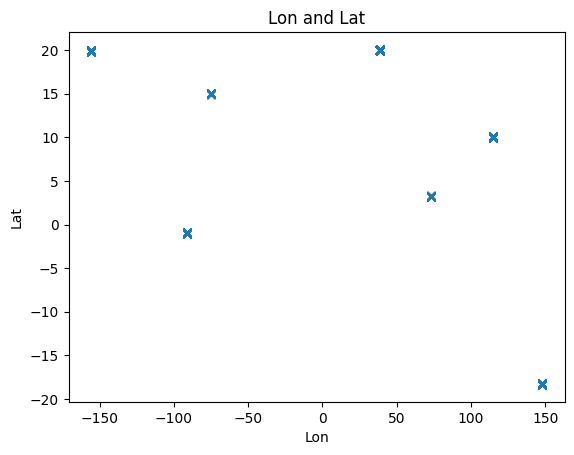

In [6]:

#Date,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave
#red_sea_df = df[df['Location'] == 'Red Sea']

plt.title('Lon and Lat')
plt.plot(df['lon'], df['lat'], 'x')
plt.xlabel('Lon')
plt.ylabel('Lat')



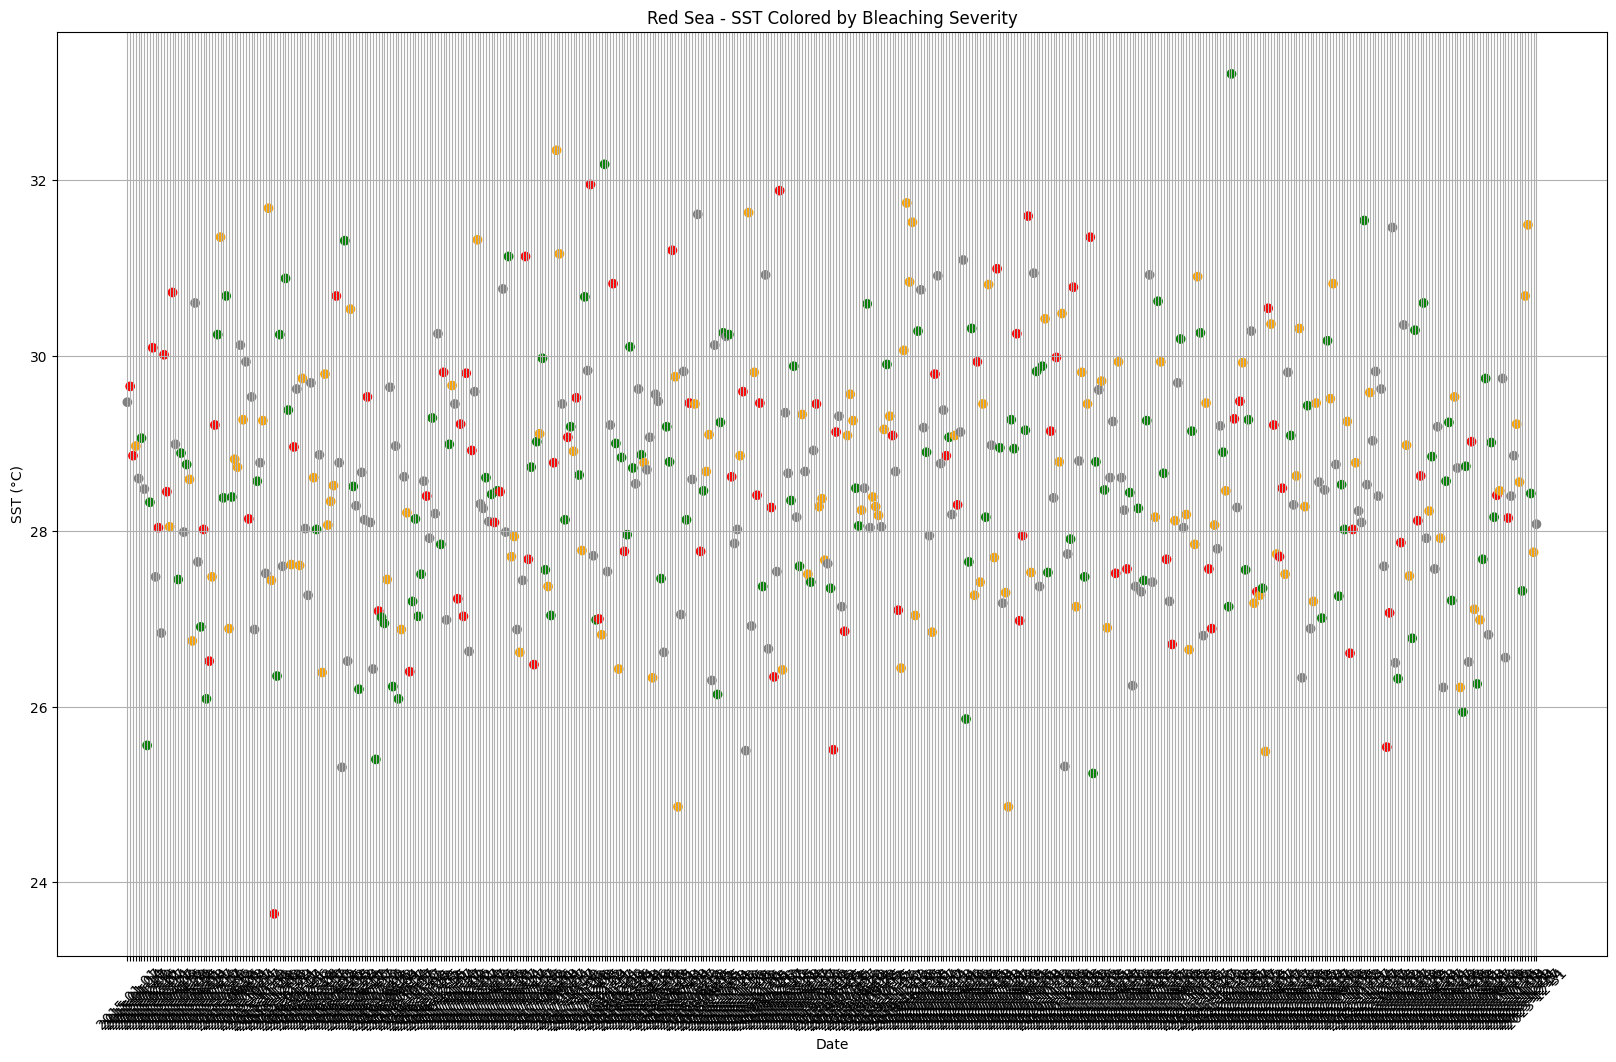

In [7]:

# Visualize Red Sea SST by Bleaching Severity
#red_sea_df = df[df['Location'] == 'Red Sea']
color_map = {
    'None': 'blue',
    'Low': 'green',
    'Medium': 'orange',
    'High': 'red'
}
colors = df['bleaching'].map(color_map).fillna('gray')

plt.figure(figsize=(20, 12))
plt.scatter(df['Date'], df['sst'], c=colors)
plt.title('Red Sea - SST Colored by Bleaching Severity')
plt.xlabel('Date')
plt.ylabel('SST (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

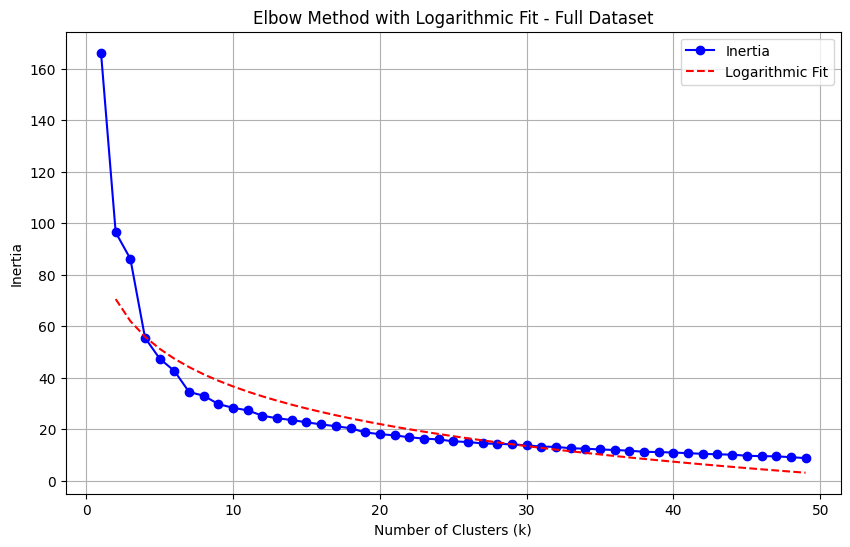

In [ ]:

'''features = df[['sst', 'pH', 'lat', 'lon']]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
'''

inertia = []
k_values = list(range(1, 50))

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Define logarithmic function for curve fitting
def log_func(x, a, b):
    return a * np.log(x) + b

# Fit the curve to the inertia data
params, _ = curve_fit(log_func, k_values[1:], inertia[1:])
log_fit = log_func(np.array(k_values[1:]), *params)

# Plot the elbow and log line
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, 'bo-', label='Inertia')
plt.plot(k_values[1:], log_fit, 'r--', label='Logarithmic Fit')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method with Logarithmic Fit - Full Dataset')
plt.legend()
plt.grid(True)
plt.show()

   Cluster    Color (RGB)
0        0  (255, 189, 0)
1        1  (132, 255, 0)
2        2   (0, 255, 57)
3        3  (0, 255, 246)
4        4   (0, 75, 255)
5        5  (114, 0, 255)
6        6  (255, 0, 207)


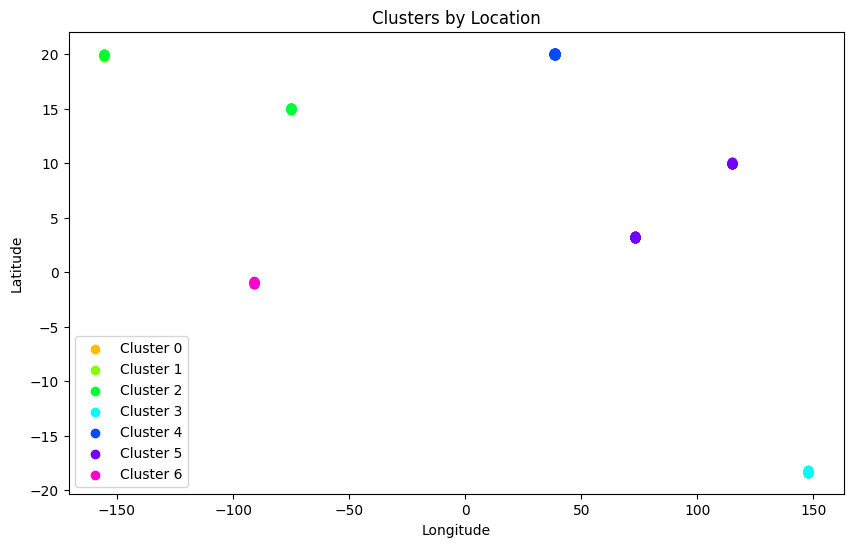

In [ ]:
# Choose optimal k
optimal_k = 7

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

'''# Plot clusters 
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['lon'],
    df['lat'],
    c=df['cluster'],
    cmap='viridis',
    s=100,
    alpha=0.7
)
plt.title(f' - Clustered by SST, pH, Lat, Lon')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.show()

for i in range(optimal_k):
    print(f"\nCluster {i} Summary:")
    print(df[df['cluster'] == i][['sst', 'pH', 'lat', 'lon']].describe())'''
    

palette = sns.color_palette("hsv", optimal_k) 
color_map = {i: palette[i] for i in range(optimal_k)}
df['color'] = df['cluster'].map(color_map)

cluster_color_table = pd.DataFrame({
    'Cluster': list(color_map.keys()),
    'Color (RGB)': [tuple(np.round(np.array(c)*255).astype(int)) for c in color_map.values()]
})

print(cluster_color_table)

plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['lon'], cluster_data['lat'], color=color_map[cluster], label=f'Cluster {cluster}')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters by Location")
plt.legend()
plt.show()